In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("laptop_data.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.shape

(1303, 12)

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True, axis=1)

In [5]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
df.duplicated().sum()

29

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(1274, 11)

In [12]:
# performing feature engineering to convert object datatype into int datatype by removing GB and kg from Ram and Weight column respectively. 
df['Ram'] = df['Ram'].str.replace("GB", '')
df['Weight'] = df["Weight"].str.replace("kg", '')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
df['Ram'] = df['Ram'].astype('float')
df['Weight'] = df["Weight"].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   float64
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(4), object(7)
memory usage: 119.4+ KB


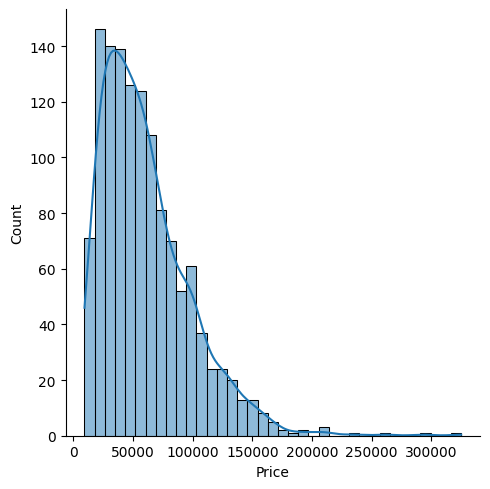

In [14]:
sns.displot(df['Price'],kde=True)

<Axes: xlabel='Company'>

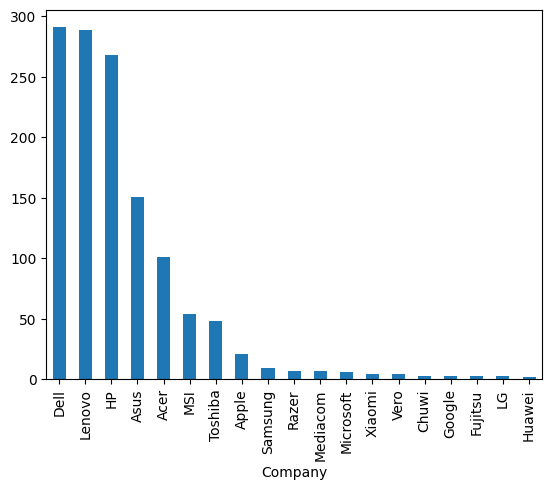

In [15]:
#finding out how many laptop companies are there?

from matplotlib.pyplot import bar


df['Company'].value_counts().plot(kind='bar')

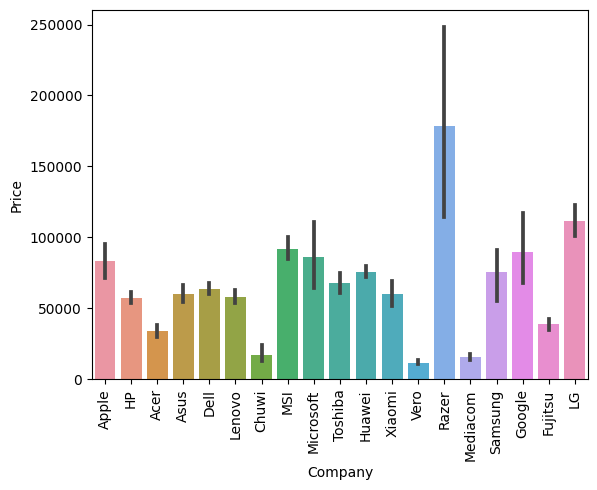

In [16]:
#comparing different prices of various companies
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

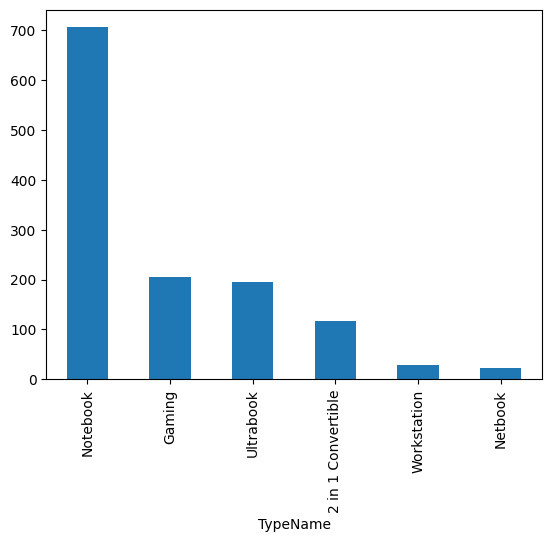

In [17]:
df['TypeName'].value_counts().plot(kind='bar')

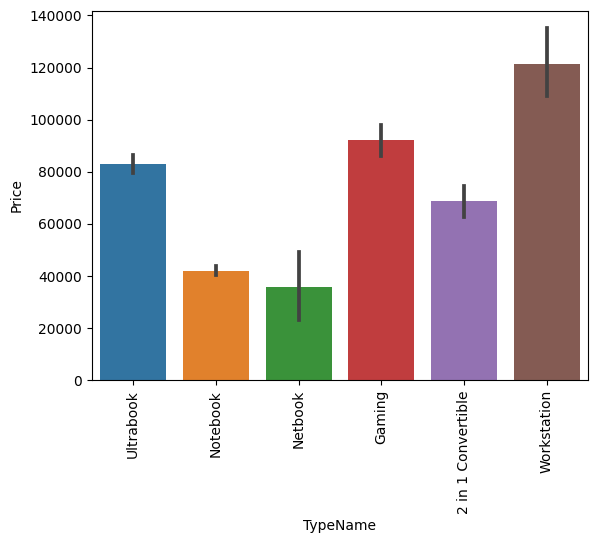

In [18]:
#comparing type of laptops with price
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

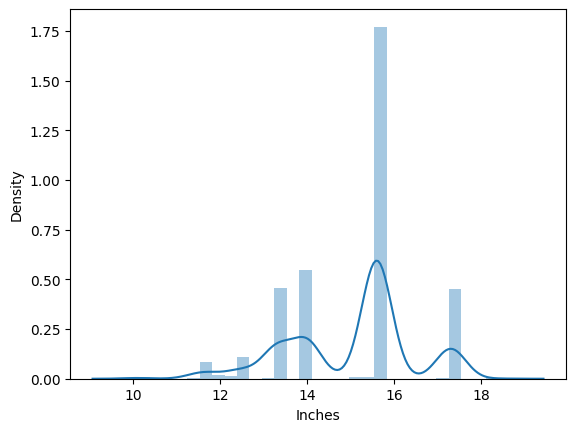

In [19]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

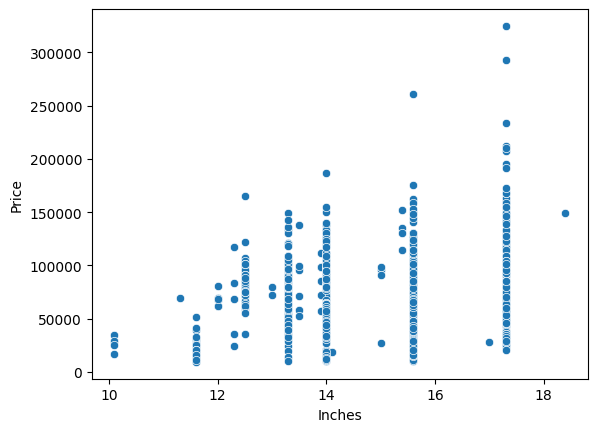

In [20]:
#finding relationship btw price and inches
sns.scatterplot(x=df['Inches'],y=df['Price'])

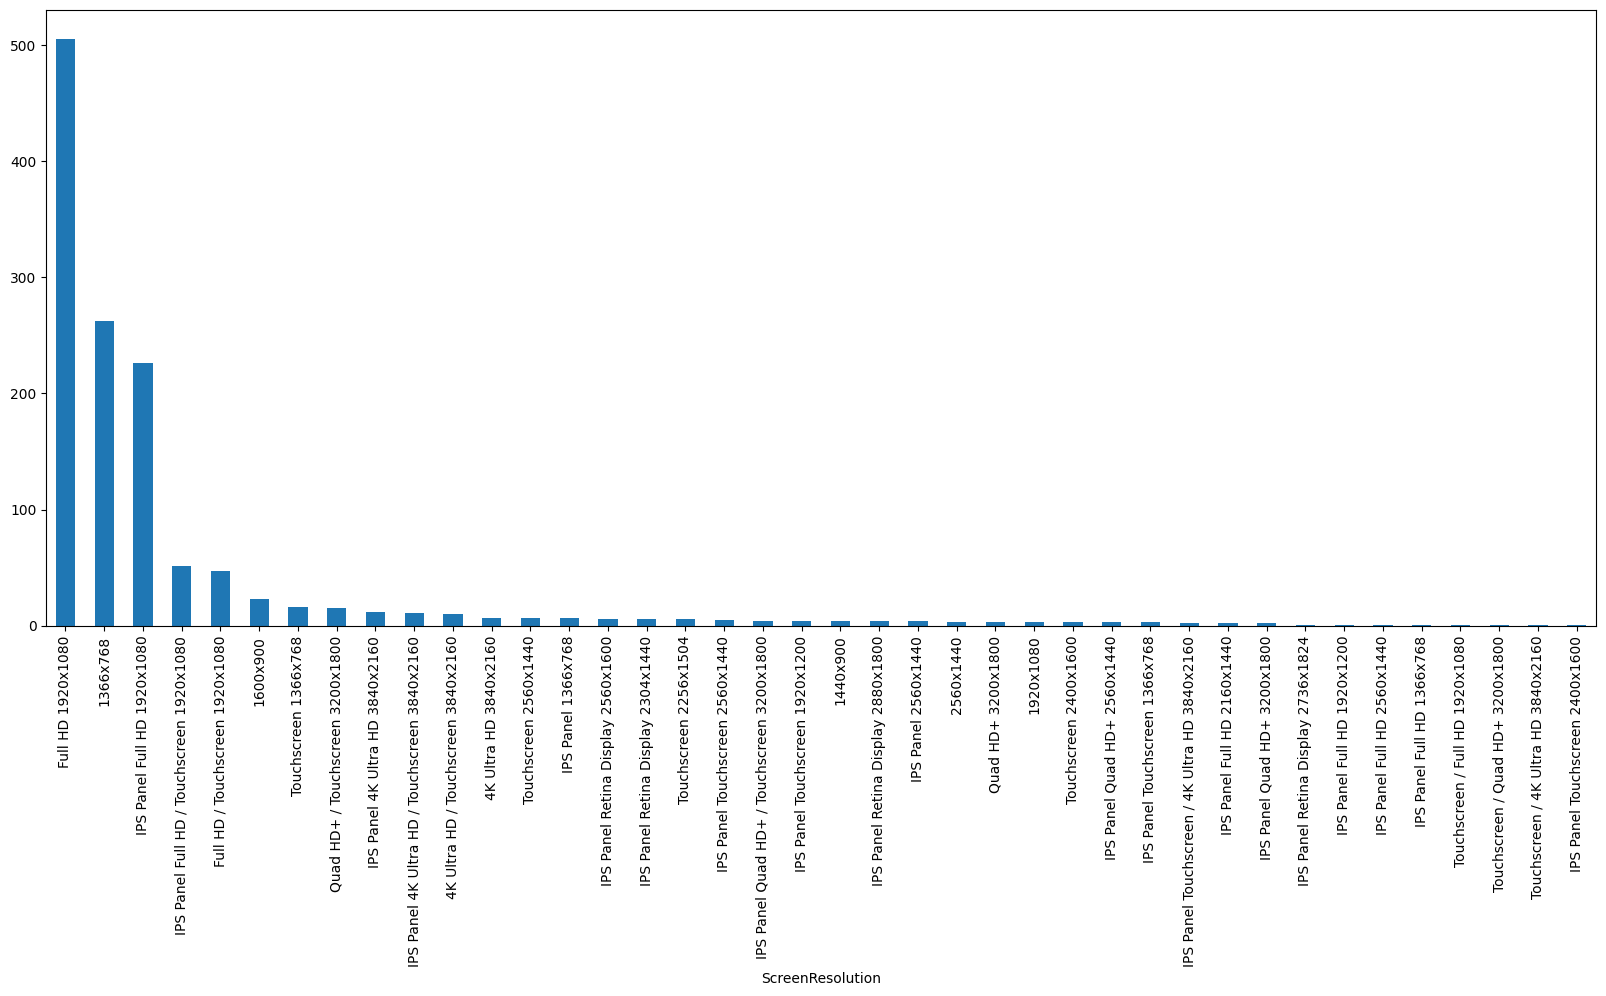

In [21]:
plt.figure(figsize=(20,8))
df['ScreenResolution'].value_counts().plot(kind='bar')
plt.show()

In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [23]:
#separating laptop with and without touchscreen 
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


In [24]:
df['Touchscreen'].value_counts()

Touchscreen
0    1086
1     188
Name: count, dtype: int64

In [25]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
703,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4.0,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.10,33110.8560,0
954,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,79333.3872,0
1200,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4.0,128GB SSD,AMD Radeon R7 M440,Windows 10,2.30,26586.7200,0
539,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.87,45767.5200,0
680,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8.0,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,53168.1120,0
214,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i7 7500U 2.7GHz,8.0,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,79866.7200,0
441,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4.0,256GB SSD,AMD Radeon 530,Windows 10,2.20,39906.7200,0
793,Lenovo,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,AMD Radeon R7 M460,Windows 10,2.08,51095.5200,1
927,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,2.31,62071.2000,0
631,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,78801.1200,0


<Axes: xlabel='Touchscreen'>

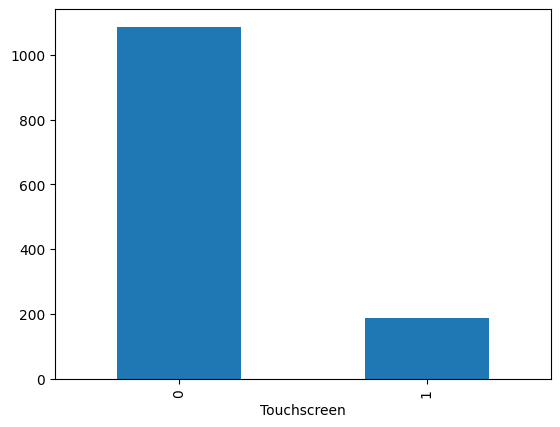

In [26]:
#how many touchscreen and non-touchscreen laptops are there
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

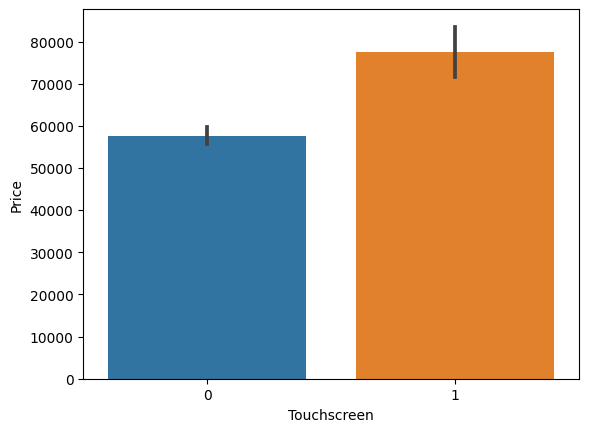

In [27]:
#comparing price of non-touchscreen and touchscreen laptop
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [28]:
#separating laptop with ips and without ips

df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
537,HP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N3710 1.6GHz,4.0,256GB SSD,Intel HD Graphics 405,Windows 10,1.86,21258.1872,0,0
393,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71874.7200,0,0
1209,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.20,130482.7200,0,0
724,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0,0
524,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,47365.9200,0,1
1180,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 10,1.36,87219.3600,1,1
1171,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Intel UHD Graphics 620,Windows 10,2.10,61751.5200,0,0
929,HP,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4.0,500GB HDD,Intel HD Graphics 520,Windows 10,1.95,61218.7200,0,0
367,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.40,43103.5200,0,1
390,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,55357.9200,0,0


<Axes: xlabel='Ips'>

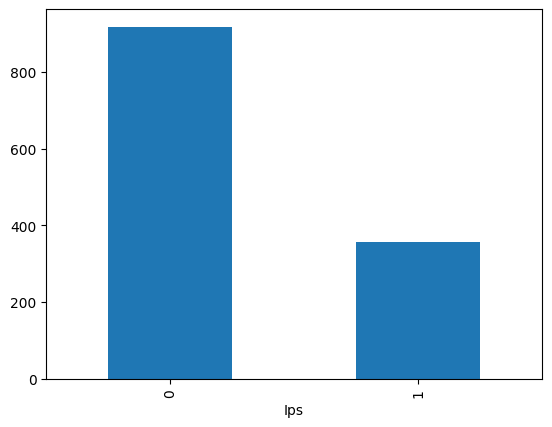

In [29]:
df['Ips'].value_counts().plot(kind='bar')

In [30]:
df['Ips'].value_counts()

Ips
0    917
1    357
Name: count, dtype: int64

<Axes: xlabel='Ips', ylabel='Price'>

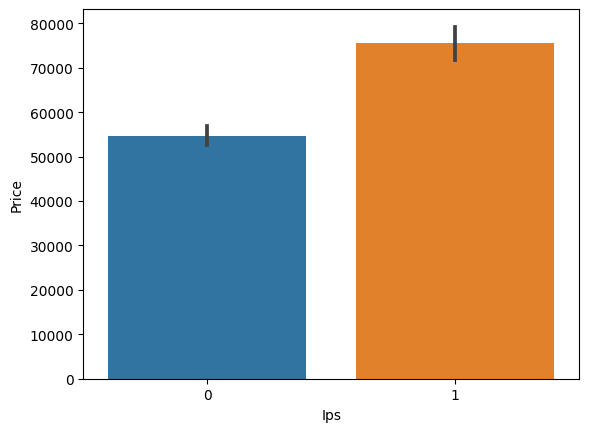

In [31]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [32]:
#splitting screen resolution into X resolution and y resolution

new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [33]:
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
786,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,58021.9200,0,0,Full HD 1920,1080
1203,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16.0,512GB SSD,Intel HD Graphics 620,Windows 10,1.20,142790.4000,1,0,Quad HD+ / Touchscreen 3200,1800
916,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,51148.8000,0,0,Full HD 1920,1080
44,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12.0,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53226.7200,1,0,Full HD / Touchscreen 1920,1080
832,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4.0,1TB HDD,Nvidia GeForce 920,Linux,2.10,27652.3200,0,0,Full HD 1920,1080
1030,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.64,51841.4400,0,0,1366,768
520,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,74538.7200,0,1,IPS Panel Full HD 1920,1080
1031,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,6.0,1TB HDD,AMD Radeon R5,Windows 10,2.10,21791.5200,0,0,1366,768
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,122490.7200,0,1,IPS Panel Full HD 1920,1080
965,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4.0,1TB HDD,AMD Radeon R5 M430,Linux,2.25,24808.2336,0,0,1366,768


In [34]:
#removing unwanted string/word in X resolution.
#keep only numeric values in X resolution

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1092,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85194.7200,0,1,1920,1080
659,Dell,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167691.8736,0,1,3840,2160
181,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.0,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,74538.7200,0,0,1920,1080
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768
1133,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,40066.5600,0,0,1920,1080
1119,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,0,0,1920,1080
775,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12.0,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,44701.9200,1,0,1920,1080
424,Dell,Gaming,17.3,IPS Panel 2560x1440,Intel Core i7 7820HK 2.9GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,149130.7200,0,1,2560,1440
236,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4.0,1TB HDD,Intel HD Graphics 520,Linux,2.10,20779.2000,0,0,1366,768
456,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.7GHz,8.0,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,109010.8800,0,1,1920,1080


In [35]:
#changing the datatype of X and Y resolution

df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   float64
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  Ips               1274 non-null   int64  
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: float64(4), int32(2), int64(2), object(7)
memory usage: 149.3+ KB


In [36]:
#making a new column Pixels per inch (PPI) which contain the property of X resolution, y resolution and inches. it is typically used to refer to the display resolution, or pixel density, of a computer monitor or screen. 
# then we can remove X_res, Y_res and inches columns from the data frame.
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [37]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
644,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4.0,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,23976.0000,0,0,1366,768,100.454670
1094,HP,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,85194.7200,0,0,1366,768,125.367428
555,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4.0,500GB HDD,Intel HD Graphics 500,Linux,2.00,11934.7200,0,0,1366,768,100.454670
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4.0,256GB SSD,AMD Radeon 520,Windows 10,1.91,26586.7200,0,0,1920,1080,141.211998
867,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.37,103896.0000,1,1,1920,1080,165.632118
800,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,256GB SSD,Nvidia Quadro M2200,Windows 10,3.14,110017.8720,0,0,1920,1080,141.211998
338,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4.0,1TB HDD,Intel HD Graphics 500,Linux,2.00,14651.4672,0,0,1366,768,100.454670
1126,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,25521.1200,1,1,1920,1200,224.173809
794,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8.0,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,62071.2000,0,1,2304,1440,226.415547
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8.0,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0,0,1366,768,100.454670


In [38]:
df.drop(columns=['ScreenResolution'],inplace=True)


In [39]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [40]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [41]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [42]:
#keeping only first three word from the cpu column

df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [43]:
# this method returns only 4 cpu brand from the Cpu Name Column (i.e Intel Core i7, Intel Core i5, Intel Core i7 and  Other Intel Processor)
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [44]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

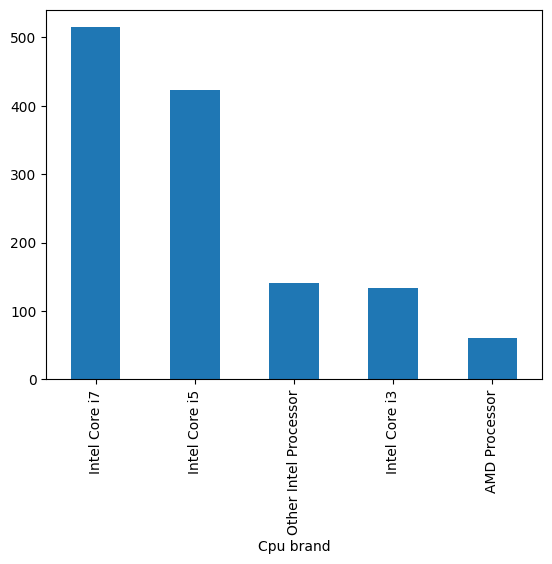

In [45]:
df['Cpu brand'].value_counts().plot(kind='bar')

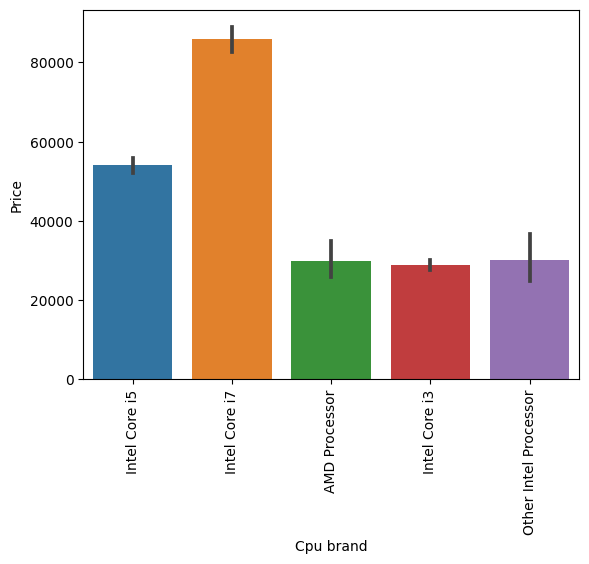

In [46]:
#comparing prices of different cpu controller 
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

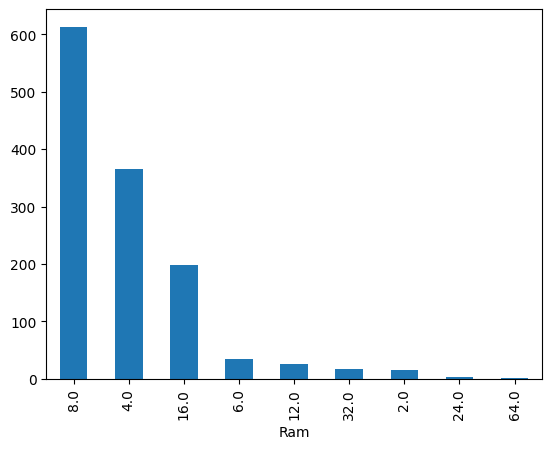

In [48]:
df['Ram'].value_counts().plot(kind='bar')

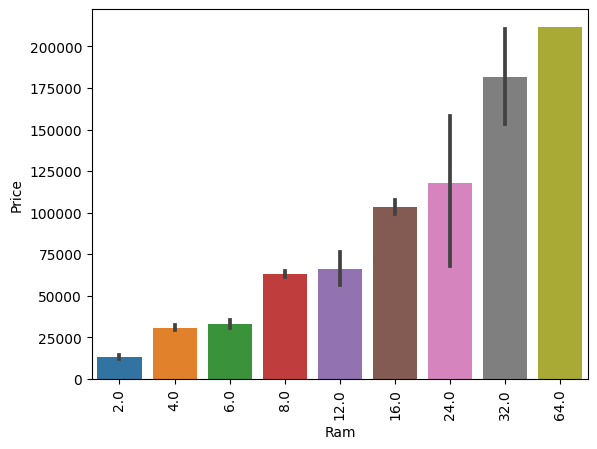

In [49]:
#comparing price of different RAM
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [51]:
# In this block we can combining memory column into 4 major memory i.e SSD, HDD, Flash Storage and Hybrid


df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

In [52]:


df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)



In [53]:
df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

In [54]:
df['first']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1269              500 HDD
1270              128 SSD
1271              512 SSD
1272     64 Flash Storage
1273             1000 HDD
Name: first, Length: 1274, dtype: object

In [55]:
import re

df['first'] = df['first'].apply(lambda x: re.sub('[^0-9]', '', x))
df['first']

0        128
1        128
2        256
3        512
4        256
        ... 
1269     500
1270     128
1271     512
1272      64
1273    1000
Name: first, Length: 1274, dtype: object

In [56]:
df['second'].value_counts()

second
0                1066
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: count, dtype: int64

In [57]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                'Layer2Flash_Storage'],inplace=True)

In [58]:
df['HDD'].value_counts()

HDD
                  715
1000              216
  1000 HDD        184
500               123
2000               16
  2000 HDD         15
  500 HDD           2
1000  1000 HDD      1
32                  1
128                 1
Name: count, dtype: int64

In [59]:

df['HDD'] = df['HDD'].apply(lambda x: re.sub('[^0-9]', '', x))

In [60]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1142,HP,2 in 1 Convertible,8.0,256 SSD,Intel HD Graphics 520,Windows 10,1.48,86793.120,1,0,165.632118,Intel Core i5,,256,,
1064,MSI,Gaming,16.0,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,102777.120,0,0,141.211998,Intel Core i7,1000,256,,
425,Dell,Gaming,8.0,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,61751.520,0,1,141.211998,Intel Core i7,1000,128,,
340,Dell,Notebook,4.0,500 HDD,Intel HD Graphics,Linux,2.20,14646.672,0,0,100.454670,Other Intel Processor,500,,,
940,HP,Gaming,8.0,128 SSD + 1000 HDD,Nvidia GeForce GTX 965M,Windows 10,2.75,74538.720,0,1,127.335675,Intel Core i5,1000,128,,
1122,HP,Notebook,8.0,256 SSD,Intel HD Graphics 520,Windows 7,1.43,80612.640,0,0,157.350512,Intel Core i5,,256,,
241,Asus,Notebook,8.0,128 SSD + 1000 HDD,Nvidia GeForce 150MX,Windows 10,2.10,61005.600,0,0,127.335675,Intel Core i7,1000,128,,
1068,Dell,Gaming,16.0,256 SSD + 1000 HDD,Nvidia GeForce GTX 970M,Windows 10,3.21,70809.120,0,0,282.423996,Intel Core i7,1000,256,,
1141,MSI,Gaming,8.0,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,60888.384,0,0,141.211998,Intel Core i7,1000,128,,
20,Asus,Netbook,2.0,32 Flash Storage,Intel HD Graphics 400,Windows 10,0.98,10224.432,0,0,135.094211,Other Intel Processor,,,,32


In [61]:
df['HDD'] = df['HDD'].replace('', 0)
df['SSD'] = df['SSD'].replace('', 0)
df['Hybrid'] = df['Hybrid'].replace('', 0)
df['Flash_Storage'] = df['Flash_Storage'].replace('', 0)

df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
318,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,Windows 10,1.95,52214.4000,0,0,157.350512,Intel Core i5,0,256,0,0
949,Acer,Notebook,4.0,32 Flash Storage,Intel HD Graphics 400,Chrome OS,1.68,18594.7200,0,0,111.935204,Other Intel Processor,0,0,0,32
1011,HP,Ultrabook,4.0,500 HDD,Intel HD Graphics 620,Windows 10,1.26,81997.9200,0,0,176.232574,Intel Core i5,500,0,0,0
28,Dell,Ultrabook,8.0,256 SSD + 256 SSD,Intel UHD Graphics 620,Windows 10,1.88,69157.4400,0,0,141.211998,Intel Core i7,0,256 256 SSD,0,0
720,Lenovo,Ultrabook,8.0,512 SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,1,209.800683,Intel Core i7,0,512,0,0
12,Apple,Ultrabook,16.0,256 SSD,AMD Radeon Pro 555,macOS,1.83,130001.6016,0,1,220.534624,Intel Core i7,0,256,0,0
175,Dell,Notebook,8.0,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,100.454670,Intel Core i3,1000,0,0,0
522,Dell,Notebook,8.0,256 SSD,Intel HD Graphics 620,Windows 10,1.64,68184.0144,0,0,157.350512,Intel Core i5,0,256,0,0
752,Asus,Notebook,4.0,1000 HDD,Nvidia GeForce GTX 950M,No OS,2.45,30849.1200,0,0,100.454670,Intel Core i5,1000,0,0,0
1148,HP,Notebook,8.0,256 SSD,Intel HD Graphics 520,Windows 7,1.88,84129.1200,0,0,141.211998,Intel Core i5,0,256,0,0


In [62]:
import re

df['SSD'] = df['SSD'].apply(lambda x: re.findall(r'\d+', str(x))[0]).astype(int)

In [63]:
df['HDD'] = df['HDD'].astype('int')
df['SSD'] = df['SSD'].astype('int')

In [64]:
df.drop(columns=["Memory"], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1274 non-null   object 
 1   TypeName       1274 non-null   object 
 2   Ram            1274 non-null   float64
 3   Gpu            1274 non-null   object 
 4   OpSys          1274 non-null   object 
 5   Weight         1274 non-null   float64
 6   Price          1274 non-null   float64
 7   Touchscreen    1274 non-null   int64  
 8   Ips            1274 non-null   int64  
 9   ppi            1274 non-null   float64
 10  Cpu brand      1274 non-null   object 
 11  HDD            1274 non-null   int64  
 12  SSD            1274 non-null   int64  
 13  Hybrid         1274 non-null   object 
 14  Flash_Storage  1274 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 159.2+ KB


In [66]:
#removing Hybrid,Flash_Storage because these features will not affect target column
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [67]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [68]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [69]:
#taking only the first word from the Gpu column
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [70]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [71]:
#removing ARM value from Gpu brand column
df = df[df['Gpu brand'] != 'ARM']

In [72]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

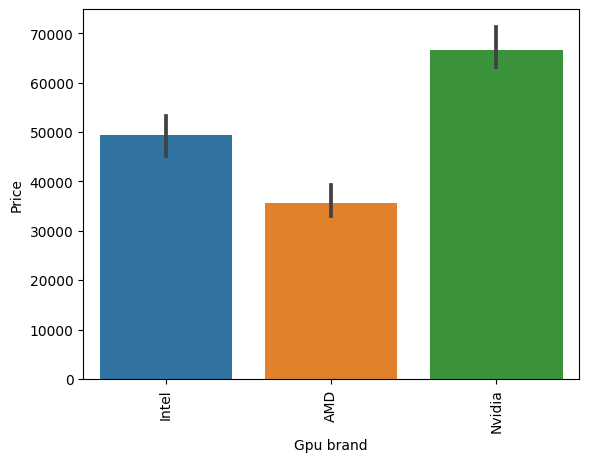

In [73]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
#removing Gpu column
df.drop(columns=['Gpu'],inplace=True)

In [75]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8.0,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8.0,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8.0,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16.0,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8.0,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [76]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [77]:
#combining Windows, mac together and all others in one value 

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [78]:
df['os'] = df['OpSys'].apply(cat_os)

In [79]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8.0,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8.0,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8.0,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16.0,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8.0,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [80]:
df.drop(columns=['OpSys'],inplace=True)

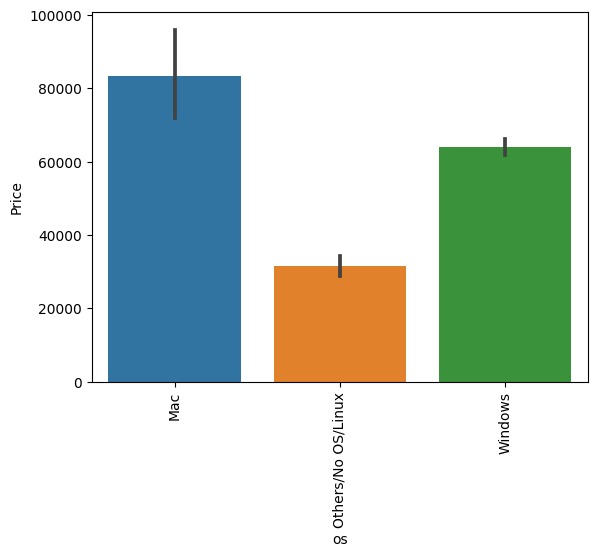

In [81]:
#comparing price w.r.t operation system 
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

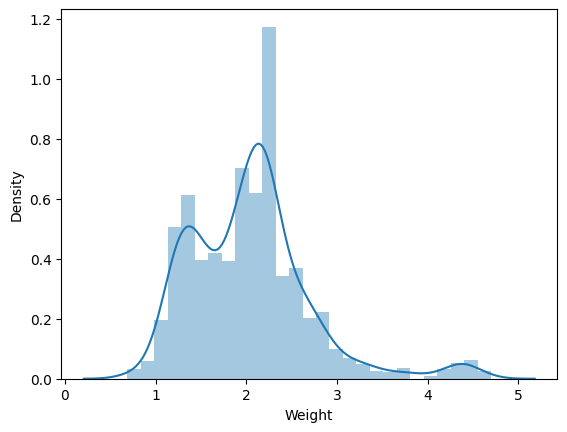

In [82]:
#looking at the weight distribution
sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Price'>

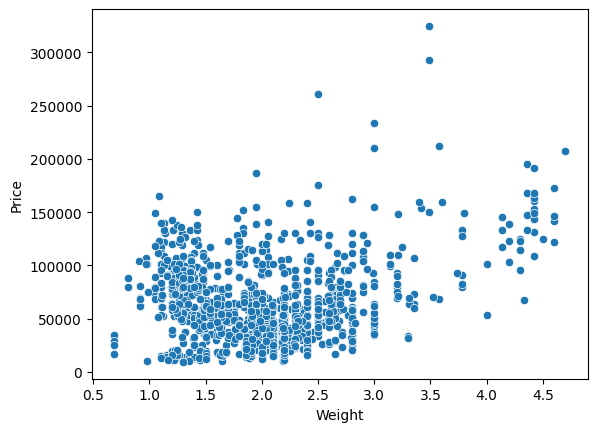

In [83]:
# comparing prices w.r.t weight 
sns.scatterplot(x=df['Weight'],y=df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

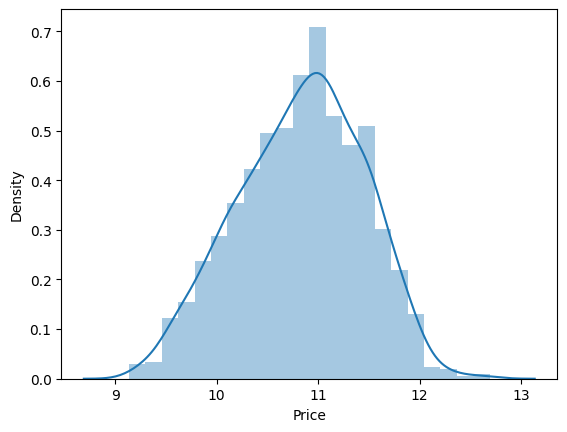

In [84]:
# the price column is right symmde. using log function to adjust the distribution of price

sns.distplot(np.log(df['Price']))

In [85]:
X = df.drop(columns=['Price'])
y = np.log(df['Price']) #to balance imbalance target variable


In [86]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8.0,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8.0,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16.0,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8.0,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4.0,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4.0,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16.0,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2.0,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [87]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)


In [89]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
716,Dell,Notebook,8.0,1.90,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
21,Lenovo,Gaming,8.0,2.50,0,1,141.211998,Intel Core i5,1000,128,Nvidia,Windows
968,Dell,Gaming,32.0,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,16.0,1.36,1,0,209.800683,Intel Core i7,0,512,Intel,Windows
1234,Apple,Ultrabook,4.0,1.08,0,0,135.094211,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4.0,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16.0,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8.0,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8.0,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   float64
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   Touchscreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   ppi          1273 non-null   float64
 8   Cpu brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu brand    1273 non-null   object 
 12  os           1273 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 139.2+ KB


In [91]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
target_correlation = df[numeric_columns].corr()['Price'].drop('Price')
target_correlation


Ram            0.739996
Weight         0.211667
Touchscreen    0.190382
Ips            0.251514
ppi            0.471481
HDD           -0.020770
SSD            0.675413
Name: Price, dtype: float64

In [92]:
df.dtypes

Company         object
TypeName        object
Ram            float64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
ppi            float64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [93]:
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
360,HP,Notebook,4.0,1.86,23389.9200,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
458,Microsoft,Ultrabook,8.0,1.25,95850.7200,1,0,200.842560,Intel Core i7,0,256,Intel,Windows
1221,MSI,Gaming,8.0,2.20,78647.1408,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
463,Lenovo,Notebook,8.0,1.50,42570.7200,0,1,157.350512,Intel Core i7,0,512,AMD,Others/No OS/Linux
636,Dell,Ultrabook,8.0,1.23,99580.3200,1,0,276.053530,Intel Core i5,0,256,Intel,Windows
1247,Asus,Gaming,16.0,2.34,123876.0000,0,1,141.211998,Intel Core i7,1000,256,Nvidia,Windows
346,HP,Notebook,2.0,1.44,14865.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
912,Lenovo,Notebook,6.0,2.20,42037.9200,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
585,MSI,Gaming,16.0,4.50,125154.7200,0,0,127.335675,Intel Core i7,1000,128,Nvidia,Windows
733,Acer,Notebook,4.0,2.40,29783.5200,0,0,100.454670,Intel Core i5,500,0,Intel,Windows


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   float64
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   Touchscreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   ppi          1273 non-null   float64
 8   Cpu brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu brand    1273 non-null   object 
 12  os           1273 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 139.2+ KB


In [95]:
df['os'].value_counts()

os
Windows               1100
Others/No OS/Linux     152
Mac                     21
Name: count, dtype: int64

In [96]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

In [97]:
df['Cpu brand'].value_counts()

Cpu brand
Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             60
Name: count, dtype: int64

In [98]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [99]:
df['TypeName'].value_counts()  

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   float64
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   Touchscreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   ppi          1273 non-null   float64
 8   Cpu brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu brand    1273 non-null   object 
 12  os           1273 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 139.2+ KB


In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


### Linear Regression

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11]) #applying column transformation (one hot encoding) to column/feature no. 0,1,7,10,11 i.e company name, type name and so on
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7844458824866835
MAE 0.22129190348778938


### Ridge

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7963698855810775
MAE 0.21775236950909915


### Lasso

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7943036183679004
MAE 0.21826518957887164


### KNN

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7457521639480935
MAE 0.21598928659480146


### Decision Tree

In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11]) 
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8096602925143952
MAE 0.20451734601002589


### SVR

In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5350106355196544
MAE 0.3232140613367908


### Stacking 

In [108]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8541828324859297
MAE 0.1832611610743773


### XGBRegressor

In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8598891022891226
MAE 0.170196548368302


### Random Forest

In [110]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                                random_state=3,
                                max_samples=0.5,
                                max_features=0.75,
                                max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8521900335055861
MAE 0.1800409498980831


### We are getting best score from RandomForest Model

In [111]:
#pickle is usually used to dumping pipeline/model

# to_csv function is used for dumping pandas data frame usually. 

#saving/dumping the transformed csv file 

df.to_csv('transformed_file.csv', index=False)

## Exporting Model

In [112]:
import pickle


pickle.dump(pipe,open('pipe.pkl','wb'))



In [115]:
pickle.dump(pipe, open('df.pkl', 'wb'))

In [113]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8.0,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8.0,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16.0,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8.0,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4.0,2.20,38378.6496,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4.0,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16.0,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2.0,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [114]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
716,Dell,Notebook,8.0,1.90,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
21,Lenovo,Gaming,8.0,2.50,0,1,141.211998,Intel Core i5,1000,128,Nvidia,Windows
968,Dell,Gaming,32.0,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,16.0,1.36,1,0,209.800683,Intel Core i7,0,512,Intel,Windows
1234,Apple,Ultrabook,4.0,1.08,0,0,135.094211,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4.0,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16.0,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8.0,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8.0,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
